# **CS105 Mini-Project**

For this project, we designed and conducted a survey targeting students from CS105, CS111, and CS010C classes to examine their caffeine consumption. Our objective was to gain insight into their daily habits, and to see if we could extrapolate any interesting conclusions from our data.

## **What is our data about?**

Our data focuses on students' caffeine consumption and its relationship to their lifestyle and health habits. It includes information on how frequently students consume caffeine, their preferred sources (such as coffee, energy drinks, or tea), and additional factors like sleep patterns, energy levels throughout the day, and other health-related behaviors. By analyzing this data, we aim to uncover connections between caffeine use and students' overall well-being, examining how it influences their sleep quality, daily energy levels, and possibly other health impacts.

## **What would we like to know about our data?**

We aim to learn how caffeine consumption affects students' daily routines, particularly regarding their sleep quality, energy levels, and overall health. By examining the frequency and sources of caffeine intake, along with lifestyle factors like sleep habits and other health behaviors, we hope to identify patterns that may reveal how caffeine influences students' physical and mental well-being. Additionally, we want to see if there are any notable trends among students in terms of their dependency on caffeine for focus and energy, helping us better understand the potential impacts of caffeine on their academic and personal lives.

## **Data Exploration/Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency, chi2, pearsonr

df = pd.read_csv("data/CleanedResponses.csv")

### **Is there an association between how often students consume caffine and their academic standing?**

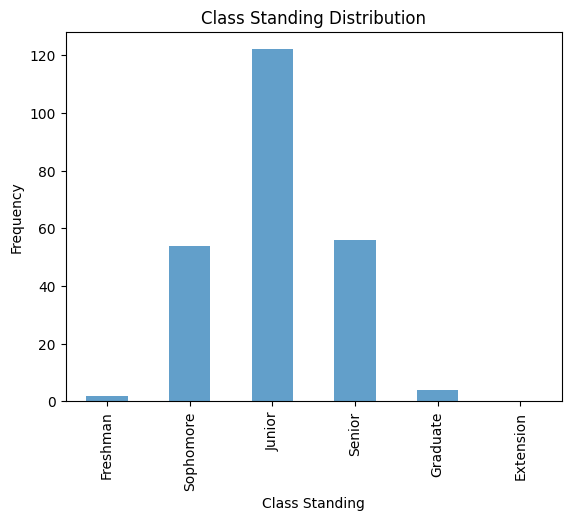

In [2]:
class_counts = df['classStanding'].value_counts()

class_order = ["Freshman", "Sophomore", "Junior", "Senior", "Graduate", "Extension"]
class_counts = class_counts.reindex(class_order)

class_counts.plot(kind='bar', stacked=True, alpha=0.7)
plt.title('Class Standing Distribution')
plt.xlabel('Class Standing')
plt.ylabel('Frequency')
plt.show()

This bar graph visualization illustrates the distribution of class standings among students in the CS010C, CS111, and CS105 courses who participated in the survey. Juniors dominate the participant pool, representing just around 120 responses. Seniors and sophomores follow, comprising about 60 responses each, with seniors being a little higher. The Freshman, Graduate, and Extension students, collectively accounts for the remaining participants, with a few for each category. The stacked area chart helps show how each class standing contributes to the total survey population, with a clear emphasis on juniors as the largest group.

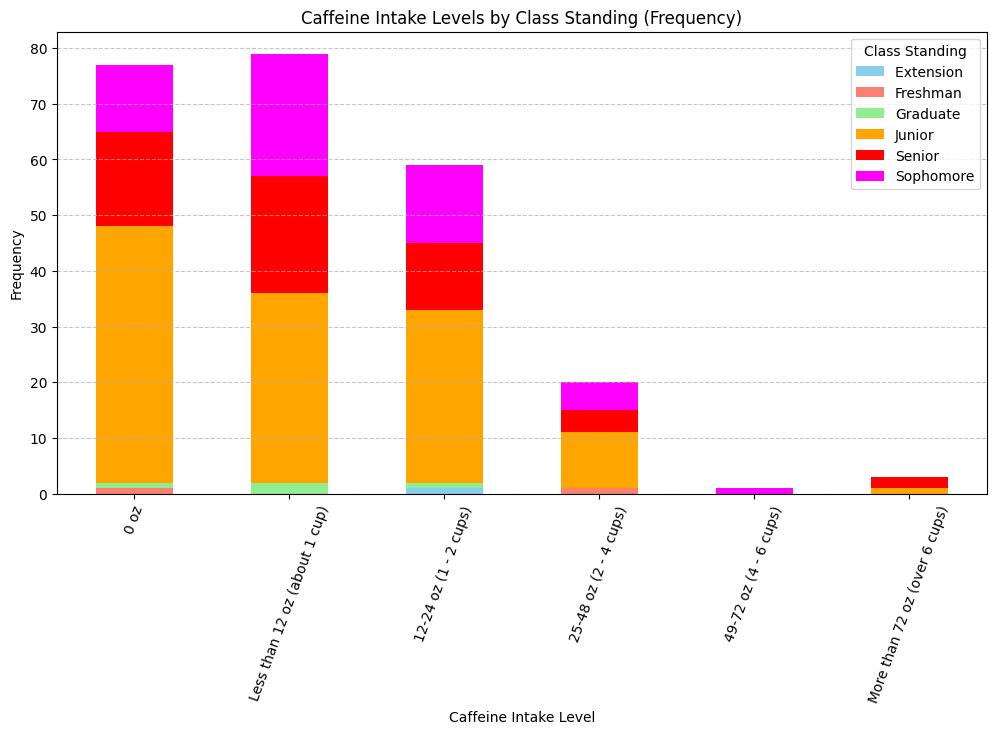

In [3]:
caffeine_counts = pd.crosstab(df['caffeineIntake'], df['classStanding'])

intake_order = ["0 oz", "Less than 12 oz (about 1 cup)", "12-24 oz (1 - 2 cups)", "25-48 oz (2 - 4 cups)", "49-72 oz (4 - 6 cups)", "More than 72 oz (over 6 cups)"]
caffeine_counts = caffeine_counts.loc[intake_order]

caffeine_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon', 'lightgreen', 'orange', 'red', 'magenta'])

plt.title('Caffeine Intake Levels by Class Standing (Frequency)')
plt.xlabel('Caffeine Intake Level')
plt.xticks(rotation=70)
plt.ylabel('Frequency')
plt.legend(title="Class Standing")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The stacked bar graph above compares students' caffeine intake levels with their academic standing. While juniors appear to have the highest caffeine consumption, this aligns with the previous stacked area chart showing that juniors made up the largest proportion of survey participants. Similarly, the "Extension," "Graduate," and "Freshman" categories have a smaller representation, which can also be seen through the stacked area graph.

The stacked bar graph reveals that most students consume no more than four cups of caffeine, with very few students drinking between 2-4 cups. A fair number of students report an intake of 1-2 cups, while those who do not consume caffeine or have only one cup form nearly equal groups, both slightly larger than the 1-2 cup category. Overall, the distribution appears balanced across academic standings, given the higher participation of juniors and the smaller numbers for freshmen, extension, and graduate students.

#### **Hypothesis: There is no association between a student's class standing and their caffine intake level.**

I will be using the Chi-Square test to test my hypothesis to check if these two variables are independent are not. 

In [4]:
caffeine_counts = pd.crosstab(df['caffeineIntake'], df['classStanding'])

chi, p, dfree, expected = chi2_contingency(caffeine_counts)
print("Calculated chi square value:", chi)
print("Calculated p value:", p)
print("Degrees of freedom:", dfree)

significance_level = 0.05
critical_value = chi2.ppf(1 - significance_level, dfree)
print(f"Critical value for {dfree} degrees of freedom at the 0.05 significance level:", critical_value)

if chi > critical_value:
    print("Reject the null hypothesis: there is a significant association between caffeine intake and class standing.")
else:
    print("Fail to reject the null hypothesis: no significant association found between caffeine intake and class standing.")

Calculated chi square value: 21.667691157763443
Calculated p value: 0.6548528883879965
Degrees of freedom: 25
Critical value for 25 degrees of freedom at the 0.05 significance level: 37.65248413348277
Fail to reject the null hypothesis: no significant association found between caffeine intake and class standing.


Based on the results of our Chi-Square test, we calculated a chi-square value of approximately 22. Comparing this to the critical value of approximately 38 at a 0.05 significance level, we find that our chi-square value is smaller than the critical value. Therefore, we fail to reject the null hypothesis, suggesting that there is no significant association between caffeine intake and class standing. This outcome is consistent with our initial hypothesis.

### **Is there a relationship between gender and preference for types of caffeinated beverages?**

We are interested in the relationship between gender and preference for types of caffeinated beverages. So we plan to conduct a chi-square test.

#### **Hypothesis: There is no correlation between gender and preference in caffeinated beverages**

Null hypothesis: two attributes, gender and type of caffeinated drink are independent.

Alternative Hypothesis: two attributes, gender and type of caffeinated drink are correlated.

In [57]:
responses = df.copy()
responses["caffeineType"] = responses['caffeineType'].fillna('None')
df_gender_type = responses[['gender', 'caffeineType']]
type_gender = pd.crosstab(df_gender_type["caffeineType"], df_gender_type["gender"])

In [6]:
# calculate the chi-square value of the dataset
chi, p, dfree, expected = chi2_contingency(type_gender)

print("Calculated chi square value: ", chi)
print("Calculated p value: ", p)
print("Degrees of freedom: ", dfree)

Calculated chi square value:  117.58993106742544
Calculated p value:  1.2962884266012364e-05
Degrees of freedom:  60


In [56]:
# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
print("For 60 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
print(chi2.ppf(0.95, 60))

For 60 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:
79.08194448784874


The chi-squared value we calculated is 117.59. The p value is 1.296. The degree of freedom is 60. We choose the significance level alpha to be 0.05. The critical value we calculated is 79.08

Since the chi-squared value 117.59 is greater than the critical value 79.08, we reject the null hypothesis. This means that gender and type of caffeinated drink are correlated.

Now that we know there is a relationship between gender and preference for types of caffeinated beverages, we want to understand the nature of this relationship more deeply. So, we have created a heatmap.

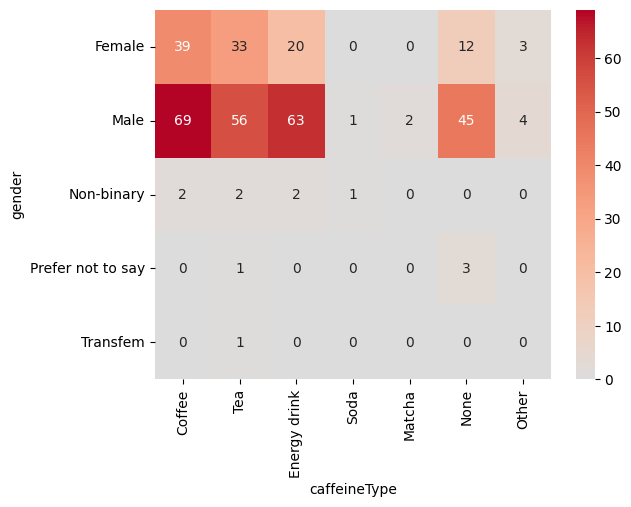

In [8]:
gender_type = pd.crosstab(df_gender_type["gender"], df_gender_type["caffeineType"])
gender_type_cleaned = gender_type.copy()
gender_type_cleaned["Coffee"] = gender_type_cleaned["Coffee"] + gender_type_cleaned["Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"]
gender_type_cleaned["Tea"] = gender_type_cleaned["Tea"] + gender_type_cleaned["Tea, Coffee"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"] + gender_type_cleaned["Tea, Energy drink"] + gender_type_cleaned["Tea, Energy drink, Soda"] + gender_type_cleaned["Tea, Matcha"] + gender_type_cleaned["Tea, pre-workout"]
gender_type_cleaned["Energy drink"] = gender_type_cleaned["Energy drink"] + gender_type_cleaned["Coffee, Energy drink"] + gender_type_cleaned["Energy drink, Matcha"] + gender_type_cleaned["Energy drink, None"] + gender_type_cleaned["Energy drink, soda"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"] + gender_type_cleaned["Tea, Energy drink"] + gender_type_cleaned["Tea, Energy drink, Soda"]
gender_type_cleaned["Soda"] = gender_type_cleaned["Energy drink, soda"] + gender_type_cleaned["Tea, Energy drink, Soda"]
gender_type_cleaned["Matcha"] = gender_type_cleaned["Energy drink, Matcha"] + gender_type_cleaned["Tea, Matcha"]
gender_type_cleaned = gender_type_cleaned[["Coffee", "Tea", "Energy drink", "Soda", "Matcha", "None", "Other"]]
gender_type_cleaned

sns.heatmap(gender_type_cleaned, center= 0, cmap = "coolwarm",annot= True)
plt.show()

This heatmap displays the distribution of caffeine preferences between different genders. We can observe that, firstly, the color of the cells for male participants in the heatmap is generally darker than that for female participants, indicating that the number of male participants is significantly higher than that of female participants. Additionally, male participants who consume coffee were by far the most common. Consumption of tea and energy drinks are also popular options for male participants. Among males, there is a fairly even distribution between the popular choices of caffeinated drinks. For female participants, coffee and tea consumption are popular choices, while the distribution for energy drinks is lower. However, to see if either gender shows a true bias towards a certain type, we must look further. So, we have created a stacked bar chart to analyze the proportions of each distribution.

<Axes: xlabel='gender'>

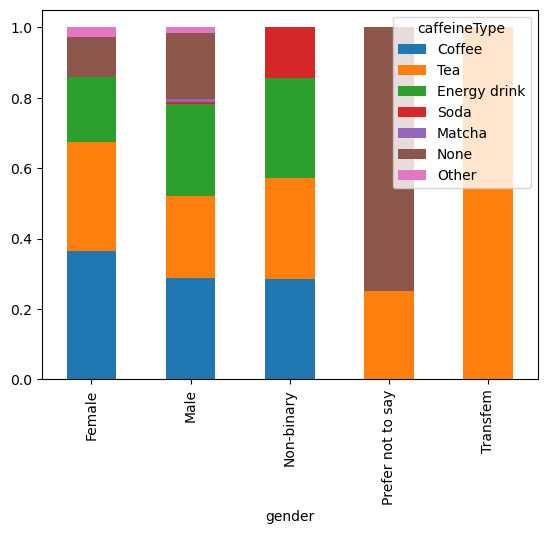

In [59]:
gender_counts = gender_type_cleaned.sum(axis=1)
type_given_gender = gender_type_cleaned.divide(gender_counts, axis=0)
type_given_gender.plot.bar(stacked=True)

This graph displays the conditional distribution of the type of caffeinated drink, given the gender. From this, we can see that different genders have different preferences for types of caffeinated beverages. We observe that female participants have a higher proportion of consuming coffee and tea compared to male participants. Conversely, male participants have a higher proportion of consuming energy drinks and not consuming any caffeine compared to female participants. We can conclude that female participants tend to prefer consuming caffeinated beverages, particularly coffee and tea. Although the proportion of male participants who consume caffeinated beverages is lower than that of female participants, male participants show a significantly higher preference for consuming energy drinks compared to female participants.

### **Is there a correlation between caffeine intake and daily energy levels?**

Hypothesis: Higher caffeine intake may initially provide an energy boost, but as intake increases beyond a certain point, the overall energy levels begin to decline.


The null hypothesis is that there is no relationship between caffeine intake and energy levels, that they are independent.

Correlation coefficient (Caffeine Intake vs Energy Levels): -0.30
p-value: 0.0000
The correlation is statistically significant.


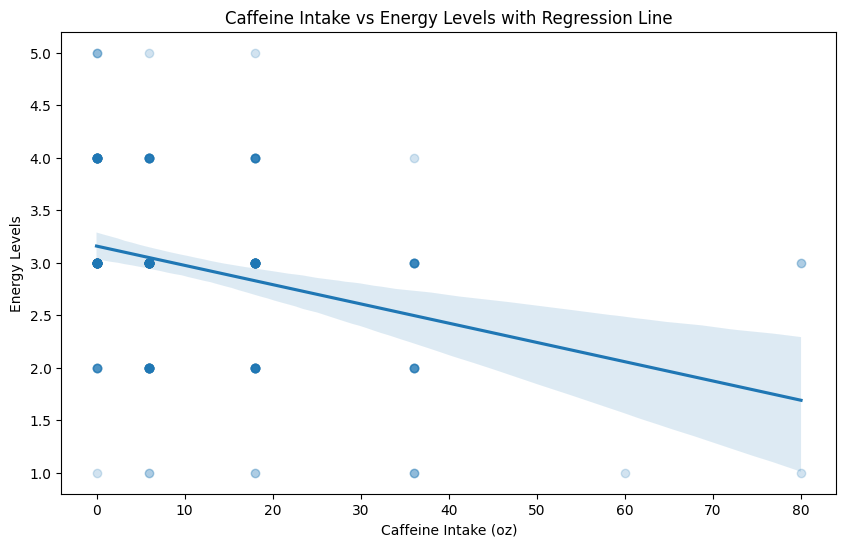

In [11]:
caffeine_amount_map = {
    "Less than 12 oz (about 1 cup)": 6,
    "12-24 oz (1 - 2 cups)": 18,
    "25-48 oz (2 - 4 cups)": 36,
    "49-72 oz (4 - 6 cups)": 60,
    "More than 72 oz (over 6 cups)": 80,
    "0 oz": 0
}
# Apply map to convert caffeineIntake to numeric values
df['caffeineIntake'] = df['caffeineIntake'].map(caffeine_amount_map)
# Create cleaned DataFrame without NaN values
df_cleaned = df.dropna(subset=['caffeineIntake', 'energyLevels'])
corr_caffeine_energy, p_value = pearsonr(df_cleaned['caffeineIntake'], df_cleaned['energyLevels'])
print(f'Correlation coefficient (Caffeine Intake vs Energy Levels): {corr_caffeine_energy:.2f}')
print(f'p-value: {p_value:.4f}')
if p_value <= 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")
plt.figure(figsize=(10, 6))
sns.regplot(x='caffeineIntake', y='energyLevels', data=df_cleaned, scatter_kws={'alpha':0.2})
plt.title('Caffeine Intake vs Energy Levels with Regression Line')
plt.xlabel('Caffeine Intake (oz)')
plt.ylabel('Energy Levels')
plt.show() 

The scatter plot of caffeine intake vs energy levels shows a slightly negative correlation, as seen by the downward slope of the regression line. The correlation coefficient between caffeine intake and energy levels is -0.3, and the negative confirms the downward slope. The dots on the left are more densely packed and have a stronger color, while the dots on the right are less frequent and have a lighter color.


The p value was less than 0.05, which indicates strong evidence against the null hypothesis, therefore the correlation is statistically significant.
This relationship can be interpreted to mean that as caffeine intake increases, energy levels initially might experience a boost, but with higher levels of caffeine, energy levels tend to drop off. This is consistent with the notion of diminishing returns with caffeine, where low to moderate doses may increase alertness, but excessive consumption will not raise alertness beyond that initial dosage and may even have negative effects.

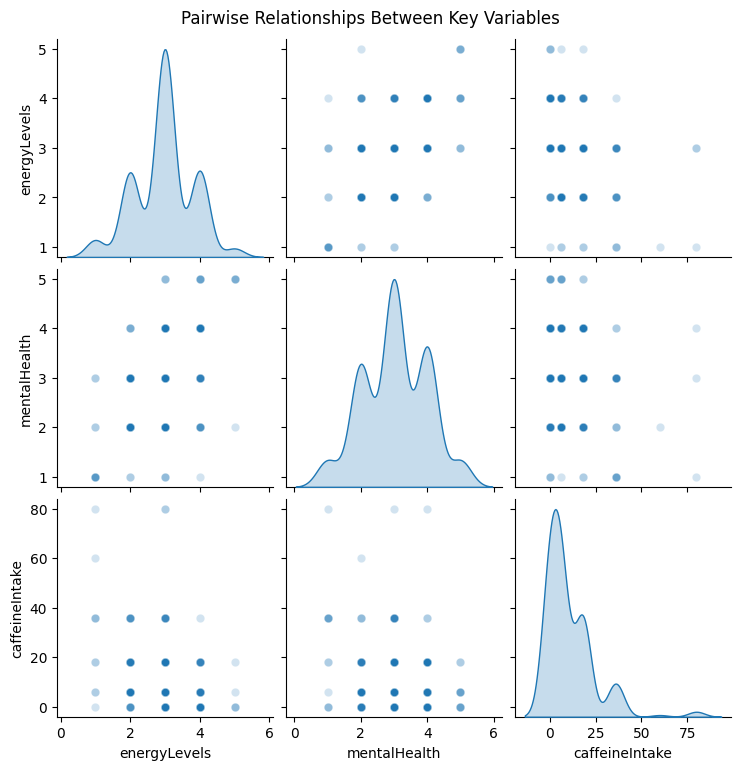

In [12]:
df_pairplot = df[['hrsSleep', 'energyLevels', 'mentalHealth', 'caffeineIntake']]
sns.pairplot(df_pairplot, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.suptitle("Pairwise Relationships Between Key Variables", y=1.02)  # Adjust title position
plt.show()

The pairwise scatter plot shows the relationship between caffeine intake, mental health and energy levels. The distribution of energy levels and mental health, the graphs in the middle, appears to have a similar head and shoulders type pattern. Both variables show more frequent responses in the middle ranges,  indicating that those with moderate or good mental health tend to report balanced energy levels.


The caffeine intake distribution on the lower right shows a concentration around lower intake levels with a rapid drop-off after 25 oz. This aligns with the scatter plot analysis, showing that high caffeine intake may not correlate strongly with higher energy or mental health. Most respondents consume caffeine either at low levels or moderately, indicating that high intake is rare and does not result in any higher energy benefits.
In the rows and columns with the caffeine intake variable the slight negative correlation is visible, when the dots are concentrated and darker to the left of the graphs, which fits the hypothesis of diminishing returns on energy levels with excessive caffeine.

### **Is there a relationship between the frequency at which one consumes caffeine and their mental health/energy levels?**

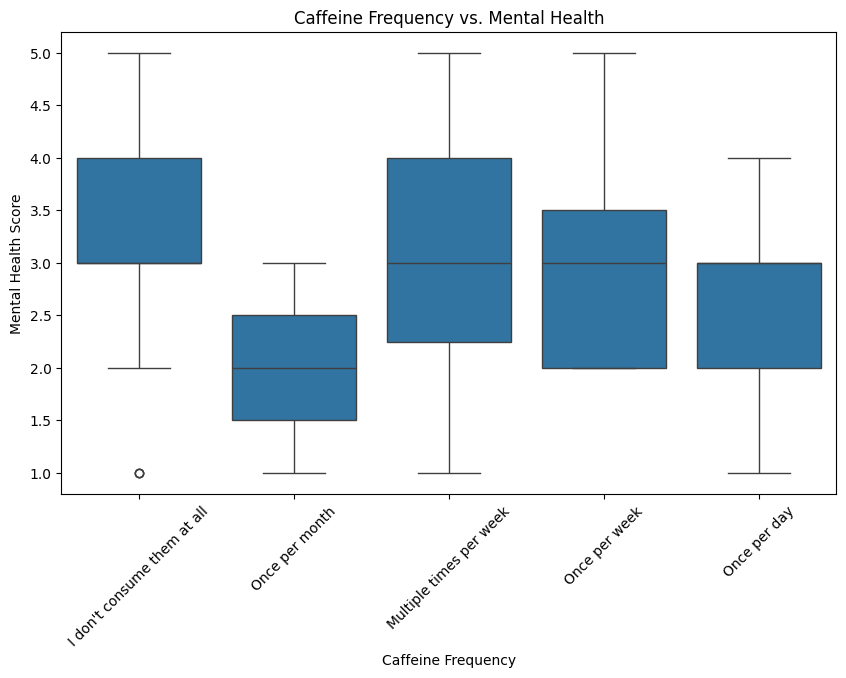

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='caffeineFreq', y='mentalHealth', data=df, order=["I don't consume them at all", "Once per month", "Multiple times per week", "Once per week", "Once per day"])
plt.title('Caffeine Frequency vs. Mental Health')
plt.xlabel('Caffeine Frequency')
plt.ylabel('Mental Health Score')
plt.xticks(rotation=45)
plt.show()

1) No caffeine: Students who skip caffeine have some of the highest and most stable mental health scores. Their scores don’t fluctuate as much, and they’re generally on the positive side, suggesting that avoiding caffeine could be connected to feeling better mentally.

2) Once per month: This group has a lower median mental health score of around 2. Their scores range from 1.5 to about 2.5, showing generally lower and more consistent mental health levels.

3) Once per week: This group has a median mental health score of 3, with most scores ranging between 2 and 3.5. This indicates a moderate and balanced mental health level among this group.

4) Multiple times per week: This group has a median mental health score of 3, similar to the once per week group. However, their scores vary widely from 2.2 to 4, indicating more fluctuation in mental health levels.

5) Once per day: This group has a median of 3. Their scores range from 2 to about 3, indicating moderately variable but generally lower mental health levels.

From what we see in here, it looks like students who drink caffeine frequently (especially multiple times a week) might experience lower mental health on average, while those who don’t consume caffeine tend to report feeling better. It’s an interesting pattern that suggests there might be a connection between how often students drink caffeine and how they feel mentally.

Making a horizontal bar chart can reveal if certain types of caffeine (like coffee, tea, energy drinks) are linked with different amounts of sleep, which is critical to well being. so I’ll plot the average sleep hours for each caffeine type.

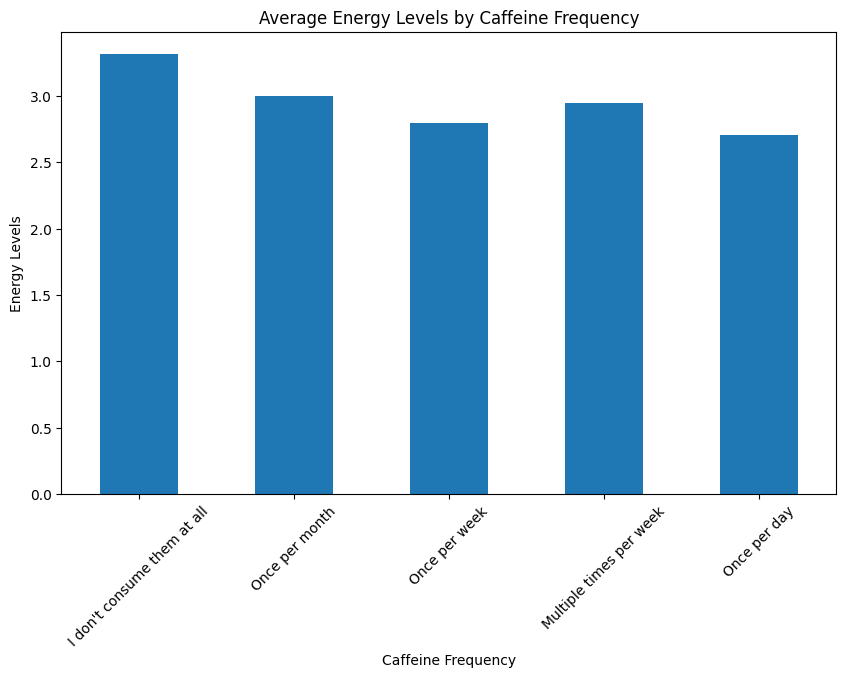

In [14]:
caffeine_freq_energy = df.groupby('caffeineFreq')['energyLevels'].mean()
caffeine_freq_energy = caffeine_freq_energy.loc[["I don't consume them at all", "Once per month", "Once per week", "Multiple times per week", "Once per day"]]

plt.figure(figsize=(10, 6))
caffeine_freq_energy.plot(kind='bar')
plt.title('Average Energy Levels by Caffeine Frequency')
plt.xlabel('Caffeine Frequency')
plt.ylabel('Energy Levels')
plt.xticks(rotation=45)
plt.show()

1) No caffeine: This group has the highest average energy levels. It might imply that a natural energy baseline, without the influence of caffeine, leads to more stable energy throughout the day.

2) Once per month: This group reports relatively high energy levels, meaning that very infrequent caffeine intake might give an energy boost without reducing baseline energy.

3) Multiple times per week: This group has moderately higher energy levels compared to daily consumers and those who drink caffeine once per week. It is possible that students consuming caffeine multiple times a week maintain a balance where they get a periodic boost without the negatives of daily use.

4) Once per week: This group reports slightly higher energy levels than daily consumers. This might mean that a less frequent intake allows the body to respond better to caffeine’s effects without experiencing significant loss in energy.

5) Once per day: This group has the lowest average energy levels. It seems that daily caffeine consumption may not be providing a sustainable energy boost, leading to dependency that leaves students feeling less energetic overall.

Overall, this visualization shows that students who either avoid caffeine or consume it very infrequently report the highest energy levels. Regular caffeine intake, especially daily, seems to correlate with lower energy levels.


## **Conclusions**

This project aimed to explore aspects of caffeine consumption among students in CS105, CS111, and CS010C classes at UCR, focusing on its effects on daily life. Below is a summary of the findings from each analysis:

#### 1) Caffeine Intake and Academic Standing:

* **Findings:** We found no significant association between caffeine intake and class standing, as indicated by the Chi-Square test results. This suggests that caffeine consumption is relatively uniform among class standings.

* **Extrapolation:** This could mean that while caffeine consumption is a prevalent behavior across students, it is not strongly linked to one's academic level.

#### 2) Gender and Preference for Caffeinated Beverages:

* **Findings:** A Chi-Square test revealed a significant relationship between gender and preference for caffeinated beverages. Female students generally preferred coffee and tea, while male students had a stronger inclination toward energy drinks.

* **Extrapolation:** This difference in beverage preferences might reflect broader cultural trends, where coffee and tea are more traditionally associated with women, while energy drinks are marketed more heavily toward men.

#### 3) Caffeine Intake and Energy Levels:

* **Findings:** There was a statistically significant negative correlation between caffeine intake and reported energy levels. Higher caffeine intake seems to lead to diminishing returns and even a drop in energy levels.

* **Extrapolation:** This suggests that while moderate caffeine consumption might provide a temporary boost, excessive consumption could have negative effects, leading to feelings of tiredness/dependency, which aligns with other research findings performed on caffeine dependency.

#### 4) Caffeine Frequency and Mental Health:

* **Findings:** Students who consumed caffeine less frequently tended to report higher and more stable mental health scores. Conversely, students who consumed caffeine more frequently reported lower and more variable mental health.

* **Extrapolation:** Frequent caffeine consumption, especially daily use, may be correlated with poor mental health, suggesting that reliance on caffeine could have negative mental health consequences, while moderate use or avoidance could be more beneficial for a student’s mental well-being.

#### 5) Caffeine Frequency and Energy Levels:

* **Findings:** Students who avoided caffeine or consumed it infrequently reported the highest energy levels, while those who consumed caffeine more often showed lower average energy levels.

* **Extrapolation:** The results imply that avoiding regular caffeine use may be correlated with maintaining stable energy levels. This suggests that students who consume caffeine regularly might experience a cycle of dependency that leads to lower energy levels over time.

#### 6) Correlation Between Caffeine Frequency and Sleep Hours:
* **Findings:** The analysis of average sleep hours across different caffeine consumption frequencies revealed that students who consumed caffeine more often reported fewer hours of sleep. This aligns with existing research showing that caffeine can interfere with sleep duration.
* **Extrapolation:** This finding highlights the potential negative impact of regular caffeine consumption on sleep, which in turn could affect students' overall health, academic performance, and mental well-being.

### **Key Takeaways:**

* **Caffeine's Impact on Health and Well-Being:** While moderate caffeine consumption is correlated with energy and alertness, overuse is heavily correlated with negative effects, such as decreased energy levels, poor mental health, and disrupted sleep. It is important to balance caffeine intake.

* **Gender Differences in Preferences:** There are notable gender-based preferences in caffeinated beverages, with women more likely to drink coffee and tea, while men tend to prefer energy drinks. These preferences could reflect both cultural factors and marketing influences.

* **Mental Health and Caffeine Frequency:** Students who avoid caffeine or consume it infrequently report better mental health outcomes, suggesting that lower caffeine dependency may correlate with better overall well-being.

In conclusion, our data analysis suggests that caffeine consumption is prevalent among students, and its effects on energy, mental health, and sleep are complex. Moderation seems key to maximizing the benefits of caffeine while minimizing its negative impacts.


## **Credits:**

Sarbesh Sankar - Bar Graph, Stacked Bar Graph, Chi Square Test (Caffeine Intake vs. Class Standing)

Zifeng Lei - Heat Map, Proportional Stacked Bar Graph, Chi Square Test (Gender vs. Preferred Caffeinated Beverage)

Joel Wissing - Correlation Analysis, Linear Regression Plot, Pairwise Scatterplot

Sarah Tabikh - Box Plot, Bar Graph

Richard Zhou - Data Cleaning, Document Organization